In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import os
import ast # 문자열을 리스트로 변환(출석 테이블)


# GCS 파일 경로에서 데이터 불러오기 위한 라이브러리
from google.cloud import storage
from google.oauth2 import service_account

In [ ]:
# # Pandas 보기 옵션
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

In [2]:

# 기본 정보 확인 함수 
def show_df_info(df, df_name):
    """
    DataFrame의 기본 정보와 통계 요약을 출력하는 함수
    """
    print(f"\n{df_name} 형태:")
    display(df.shape)
    print(f"\n{df_name} 첫 5행:")
    display(df.head())
    print(f"\n{df_name} 정보:")
    df.info()
    print(f"\n{df_name} 통계 요약:")
    display(df.describe())
    print(f"\n{df_name} 통계 요약:")
    display(df.describe(include = 'O'))
    print(f"\n{df_name} 결측치 확인:")
    display(df.isnull().sum())
    # print(f"\n{df_name} 중복값 확인:")
    # print(df.iloc[:,1:].duplicated().sum())

# 파일 불러오기 및 확인

In [3]:
# 인증
key_path = "../config/codeit_project_vm_key.json"
credentials = service_account.Credentials.from_service_account_file(key_path)

# GCS 클라이언트 생성
client = storage.Client(credentials=credentials)
bucket = client.bucket("part4_project")

# 'votes/' 경로에 있는 .parquet 파일 리스트 가져오기
blobs = bucket.list_blobs(prefix="votes/")
votes_file_list = [f"gs://part4_project/{blob.name}" for blob in blobs if blob.name.endswith(".parquet")] 

# 결과 확인
votes_file_list

['gs://part4_project/votes/accounts_attendance.parquet',
 'gs://part4_project/votes/accounts_blockrecord.parquet',
 'gs://part4_project/votes/accounts_failpaymenthistory.parquet',
 'gs://part4_project/votes/accounts_friendrequest.parquet',
 'gs://part4_project/votes/accounts_group.parquet',
 'gs://part4_project/votes/accounts_nearbyschool.parquet',
 'gs://part4_project/votes/accounts_paymenthistory.parquet',
 'gs://part4_project/votes/accounts_pointhistory.parquet',
 'gs://part4_project/votes/accounts_school.parquet',
 'gs://part4_project/votes/accounts_timelinereport.parquet',
 'gs://part4_project/votes/accounts_user.parquet',
 'gs://part4_project/votes/accounts_user_contacts.parquet',
 'gs://part4_project/votes/accounts_userquestionrecord.parquet',
 'gs://part4_project/votes/accounts_userwithdraw.parquet',
 'gs://part4_project/votes/event_receipts.parquet',
 'gs://part4_project/votes/events.parquet',
 'gs://part4_project/votes/polls_question.parquet',
 'gs://part4_project/votes/polls

In [4]:
# 파일들을 각각 변수로 불러오기
for title in votes_file_list:
    # GCS 경로에서 파일명 추출
    file_name = title.split('/')[-1].replace('.parquet', '')
    
    # Parquet 파일 읽기
    df = pd.read_parquet(title, storage_options={"token": key_path})
    
    # 각각의 이름_df로 저장 (ex. device_properties_df)
    globals()[f"{file_name}_df"] = df
    
    # 출력 확인 (shape + head)
    print(f"\n {file_name}_df 불러오기 완료")
    print(f"→ shape: {df.shape}")
    print(f"→ 첫 5행:")
    display(df.head())
    
    # # event_datetime이 있는 경우 날짜 변환 및 범위 출력
    # if 'event_datetime' in df.columns:
    #     try:
    #         df['event_datetime'] = pd.to_datetime(df['event_datetime'])
    #         min_date = df['event_datetime'].min().date()
    #         max_date = df['event_datetime'].max().date()
    #         print(f"📆 df_{file_name} 의 event_datetime 범위: {min_date} ~ {max_date}")
    #     except Exception as e:
    #         print(f"⚠️ df_{file_name} 의 event_datetime 변환 중 오류 발생: {e}")
    # else:
    #     print(f"⛔ df_{file_name} 에는 'event_datetime' 컬럼이 존재하지 않음")


 accounts_attendance_df 불러오기 완료
→ shape: (349637, 3)
→ 첫 5행:


,id,attendance_date_list,user_id
0,1,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1446852
1,2,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1359398
2,3,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1501542
3,4,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1507767
4,5,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1287453



 accounts_blockrecord_df 불러오기 완료
→ shape: (19482, 5)
→ 첫 5행:


,id,reason,created_at,block_user_id,user_id
0,1,그냥...,2023-05-04 23:01:53,867483,878476
1,2,친구 사이가 어색해짐,2023-05-05 01:17:08,867190,867564
2,3,나랑 관련 없는 질문을 자꾸 보냄,2023-05-05 01:50:55,875110,875261
3,6,그냥...,2023-05-05 05:21:52,883696,883511
4,7,그냥...,2023-05-05 06:40:34,871349,870177



 accounts_failpaymenthistory_df 불러오기 완료
→ shape: (163, 5)
→ 첫 5행:


,id,productId,phone_type,created_at,user_id
0,6,heart.200,A,2023-05-14 05:49:22,1055891
1,7,heart.777,A,2023-05-14 08:17:21,1152151
2,8,heart.777,A,2023-05-14 10:11:46,986200
3,9,heart.1000,A,2023-05-14 11:53:09,1028261
4,10,heart.777,A,2023-05-14 12:30:47,1235730



 accounts_friendrequest_df 불러오기 완료
→ shape: (17147175, 6)
→ 첫 5행:


,id,status,created_at,updated_at,receive_user_id,send_user_id
0,7,P,2023-04-17 18:29:11,2023-04-17 18:29:11,831962,837521
1,10,A,2023-04-17 18:29:11,2023-04-22 06:02:53,832151,837521
2,11,A,2023-04-17 18:29:11,2023-04-18 19:28:41,832340,837521
3,13,A,2023-04-17 18:29:11,2023-04-19 11:05:04,833041,837521
4,20,P,2023-04-17 18:29:11,2023-04-17 18:29:11,834415,837521



 accounts_group_df 불러오기 완료
→ shape: (84515, 4)
→ 첫 5행:


,id,grade,class_num,school_id
0,1,1,1,1
1,8,3,2,1
2,9,3,3,1
3,10,2,2,1
4,11,2,3,1



 accounts_nearbyschool_df 불러오기 완료
→ shape: (59500, 4)
→ 첫 5행:


,id,distance,nearby_school_id,school_id
0,119021,0.004564,6,7
1,119022,0.010787,13,7
2,119023,0.012928,20,7
3,119024,0.013590,4,7
4,119025,0.014122,24,7



 accounts_paymenthistory_df 불러오기 완료
→ shape: (95140, 5)
→ 첫 5행:


,id,productId,phone_type,created_at,user_id
0,6,heart.777,A,2023-05-13 21:28:34,1211127
1,7,heart.777,A,2023-05-13 21:29:39,1151343
2,8,heart.777,A,2023-05-13 21:31:33,1002147
3,9,heart.777,A,2023-05-13 21:31:39,1095040
4,11,heart.777,A,2023-05-13 21:34:32,1164081



 accounts_pointhistory_df 불러오기 완료
→ shape: (2338918, 5)
→ 첫 5행:


,id,delta_point,created_at,user_id,user_question_record_id
0,790629,9,2023-04-28 12:27:49,849436,771777.0
1,790652,9,2023-04-28 12:28:02,849436,771800.0
2,790664,5,2023-04-28 12:28:09,849436,771812.0
3,790680,13,2023-04-28 12:28:16,849436,771828.0
4,790703,5,2023-04-28 12:28:26,849436,771851.0



 accounts_school_df 불러오기 완료
→ shape: (5951, 4)
→ 첫 5행:


,id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,5,충청북도 충주시,160,M
2,6,충청북도 충주시,200,H
3,7,충청북도 충주시,114,H
4,8,충청북도 충주시,139,M



 accounts_timelinereport_df 불러오기 완료
→ shape: (208, 6)
→ 첫 5행:


,id,reason,created_at,reported_user_id,user_id,user_question_record_id
0,28,타인을 사칭함,2023-05-06 04:44:57,874587,885082,3920588
1,37,친구를 비하하거나 조롱하는 어투,2023-05-06 05:41:19,881048,881298,4018679
2,46,친구를 비하하거나 조롱하는 어투,2023-05-06 06:26:59,887882,881945,4120914
3,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049
4,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049



 accounts_user_df 불러오기 완료
→ shape: (677085, 16)
→ 첫 5행:


,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0



 accounts_user_contacts_df 불러오기 완료
→ shape: (5063, 4)
→ 첫 5행:


,id,contacts_count,invite_user_id_list,user_id
0,259,30,[],1167696
1,1756,79,[],863169
2,13742,21,[854615],857205
3,13754,29,[],851431
4,13756,28,[849318],855476



 accounts_userquestionrecord_df 불러오기 완료
→ shape: (1217558, 12)
→ 첫 5행:


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0



 accounts_userwithdraw_df 불러오기 완료
→ shape: (70764, 3)
→ 첫 5행:


,id,reason,created_at
0,42,재밌는 질문이 없어서,2023-03-29 13:22:12
1,43,함께 할 친구가 없어서,2023-03-29 13:24:59
2,44,함께 할 친구가 없어서,2023-03-29 13:53:32
3,45,함께 할 친구가 없어서,2023-03-29 13:54:03
4,46,재밌는 질문이 없어서,2023-03-30 00:31:19



 event_receipts_df 불러오기 완료
→ shape: (309, 5)
→ 첫 5행:


,id,created_at,event_id,user_id,plus_point
0,2,2023-06-22 09:25:16,1,1193618,500
1,3,2023-06-22 09:38:53,1,928351,500
2,4,2023-06-22 10:32:15,1,904872,500
3,5,2023-06-22 13:03:06,1,974697,500
4,6,2023-06-22 13:40:38,1,1168260,500



 events_df 불러오기 완료
→ shape: (3, 6)
→ 첫 5행:


,id,title,plus_point,event_type,is_expired,created_at
0,1,코드잇 은행 가입 이벤트,500,FCFS,1,2023-06-20 11:56:38
1,2,코드잇 멤버십 가입 이벤트,1000,FCFS,1,2023-08-08 07:43:45
2,3,예고 영상 기대평 이벤트,500,FCFS,1,2023-09-24 17:05:59



 polls_question_df 불러오기 완료
→ shape: (5025, 3)
→ 첫 5행:


,id,question_text,created_at
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53
1,100,"""이 사람으로 한 번 살아보고 싶다"" 하는 사람은?",2023-03-31 15:22:53
2,101,미래의 틱톡커는?,2023-03-31 15:22:54
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55



 polls_questionpiece_df 불러오기 완료
→ shape: (1265476, 5)
→ 첫 5행:


,id,is_voted,created_at,question_id,is_skipped
0,998458,1,2023-04-28 12:27:22,252,0
1,998459,1,2023-04-28 12:27:22,244,0
2,998460,1,2023-04-28 12:27:22,183,0
3,998461,1,2023-04-28 12:27:22,101,0
4,998462,1,2023-04-28 12:27:22,209,0



 polls_questionreport_df 불러오기 완료
→ shape: (51424, 5)
→ 첫 5행:


,id,reason,created_at,question_id,user_id
0,1,이 질문은 재미없어요,2023-04-19 06:20:35,250,837556
1,2,이 질문은 재미없어요,2023-04-19 06:58:09,113,837672
2,3,불쾌한 내용이 포함되어 있음,2023-04-19 06:58:17,113,837672
3,4,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:42,119,837922
4,5,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:50,119,837922



 polls_questionset_df 불러오기 완료
→ shape: (158384, 6)
→ 첫 5행:


,id,question_piece_id_list,opening_time,status,created_at,user_id
0,99817,"[998458, 998459, 998460, 998461, 998462, 99846...",2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
1,99830,"[998588, 998589, 998590, 998591, 998592, 99859...",2023-04-28 12:28:07,F,2023-04-28 12:28:07,849438
2,99840,"[998689, 998691, 998693, 998695, 998697, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,847375
3,99841,"[998688, 998690, 998692, 998694, 998696, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,849446
4,99848,"[998768, 998769, 998770, 998771, 998772, 99877...",2023-04-28 12:28:57,F,2023-04-28 12:28:57,849477



 polls_usercandidate_df 불러오기 완료
→ shape: (4769609, 4)
→ 첫 5행:


,id,created_at,question_piece_id,user_id
0,3088872,2023-04-28 12:27:49,998458,849444
1,3088873,2023-04-28 12:27:49,998458,849454
2,3088874,2023-04-28 12:27:49,998458,849460
3,3088875,2023-04-28 12:27:49,998458,849469
4,3088964,2023-04-28 12:28:02,998459,849446


# 추가 컬럼 작업
- 회원가입후 첫투표까지 소요일 : ? 요거 승희가 한거 있지 않았나?? -> 이거 제일 나중에
- 친구 수 : accounts_user; friend_id_list 에서 친구 id 개수 세기 (o)
- 선택받은 횟수 : accounts_userquestionrecord; chosen_user_id 에서 이 유저가 선택 몇번 받았는지 확인 (o)
- 선택한횟수(투표횟수) : accounts_userquestionrecord; user_id 에서 선택한 유저 id에 이 유저가 몇번 투표 했는지를 확인 (o)
- 친구요청보낸수 : accounts_friendrequest; send_user_id에 얼마나 나오나 확인 (o)
- 친구요청받은수 : accounts_friendrequest; receive_user_id에 얼마나 나오나 확인 (o)
- 포인트이벤트참여횟수 : event_receipts; user_id에 몇번 나오나 확인 (o)
- 질문오픈시간(평균/중위수) : polls_question_set; user_id & opening_time으로 확인 (o)
---

필요한 테이블 전처리
1. accounts_user  
    - 결측치 다 삭제; 일반&여성 유저 결측치도 삭제 
    - group_id 형태 float -> int로 변환
    - 컬럼추가 
        - friend_id_list -> friend_cnt
        - block_user_id_list -> block_user_cnt
        - hide_user_id_list -> hide_user_cnt  
    - id -> user_id로 컬럼명 변경
2. accounts_userquestionrecord    
3. accounts_friendrequest    
    - 중복값은 마지막 값 제외하고 삭제    
4. event_receipts : 전처리 x  
5. polls_question_set : 전처리 x

## 친구수; account_user 테이블 

In [12]:
print(accounts_user_df.shape)
display(accounts_user_df.describe())

(677085, 16)


,id,is_superuser,is_staff,point,is_push_on,created_at,report_count,alarm_count,pending_chat,pending_votes,group_id
count,6.770850e+05,677085.000000,677085.000000,6.770850e+05,677085.000000,677085,677085.000000,677085.000000,677085.000000,677085.000000,677082.000000
mean,1.212969e+06,0.000003,0.000004,3.039145e+03,0.843098,2023-05-15 22:46:01.709213440,0.037291,0.946646,0.098469,84.630518,37022.980168
min,8.319560e+05,0.000000,0.000000,0.000000e+00,0.000000,2023-03-29 03:44:14.047130,0.000000,0.000000,-1.000000,0.000000,1.000000
25%,1.028075e+06,0.000000,0.000000,4.000000e+02,1.000000,2023-05-09 01:35:23.126586880,0.000000,0.000000,0.000000,2.000000,18488.000000
50%,1.211729e+06,0.000000,0.000000,9.650000e+02,1.000000,2023-05-13 10:50:57.476214016,0.000000,1.000000,0.000000,29.000000,35614.000000
75%,1.397906e+06,0.000000,0.000000,2.183000e+03,1.000000,2023-05-20 07:49:47.800349952,0.000000,1.000000,0.000000,122.000000,54534.000000
max,1.583733e+06,1.000000,1.000000,8.850000e+08,1.000000,2024-05-09 08:31:17.710824,253.000000,40878.000000,5712.000000,3352.000000,84546.000000
std,2.138971e+05,0.001719,0.002105,1.076020e+06,0.363709,NaN,0.588105,56.114858,11.087769,123.262688,21997.765398


In [5]:
# 1. 결측치 삭제 (3행)
accounts_user_df =  accounts_user_df.dropna()
accounts_user_df.shape

(677082, 16)

In [6]:
# 2. group_id 형 변환
accounts_user_df.loc[:,'group_id'] = accounts_user_df['group_id'].astype('int')

In [7]:
# 3. 컬럼 추가 (friend_id_list -> friend_cnt로 바꾸기 / 나머지는 무시)

# 유저별 친구수 구하기

accounts_user_df = accounts_user_df.copy()

# friend_id_list 리스트로 변환
accounts_user_df['friend_id_list_transform'] = accounts_user_df['friend_id_list'].apply(ast.literal_eval)

# 친구 수 추가
accounts_user_df['friend_cnt'] = accounts_user_df['friend_id_list_transform'].apply(len)

accounts_user_df.head()


,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id,friend_id_list_transform,friend_cnt
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0,"[833025, 832642, 982531, 879496, 838541, 83752...",43
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0,"[838785, 982531, 882567, 879496, 838541, 83649...",51
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0,"[841345, 982531, 838785, 963714, 882567, 83252...",57
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0,"[874050, 849763, 874212, 844297, 838541, 84004...",18
5,832614,0,0,M,1048,"[838541, 833041, 832151, 837806, 1437874, 1142...",1,2023-03-29 12:56:35.064406,[],[],N,0,28,0,14,12.0,"[838541, 833041, 832151, 837806, 1437874, 1142...",21


In [8]:
# 4. id -> user_id로 컬럼명 변경
accounts_user_df = accounts_user_df.rename(columns = {'id':'user_id'}) 

In [9]:
accounts_user_df.shape # 677082명 유저

(677082, 18)

In [10]:
accounts_user_df['friend_cnt'].describe()

count    677082.000000
mean         53.327928
std          32.226461
min           0.000000
25%          31.000000
50%          49.000000
75%          70.000000
max        1373.000000
Name: friend_cnt, dtype: float64

## 선택받은 횟수, 선택한 횟수; userquestionrecord 테이블 
- 선택받은 횟수 : accounts_userquestionrecord; chosen_user_id 에서 이 유저가 선택 몇번 받았는지 확인
- 선택한횟수(투표횟수) : accounts_userquestionrecord; user_id 에서 선택한 유저 id에 이 유저가 몇번 투표 했는지를 확인

In [28]:
accounts_userquestionrecord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217558 entries, 0 to 1217557
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1217558 non-null  int64         
 1   status             1217558 non-null  object        
 2   created_at         1217558 non-null  datetime64[ns]
 3   chosen_user_id     1217558 non-null  int64         
 4   question_id        1217558 non-null  int64         
 5   user_id            1217558 non-null  int64         
 6   question_piece_id  1217558 non-null  int64         
 7   has_read           1217558 non-null  int64         
 8   answer_status      1217558 non-null  object        
 9   answer_updated_at  1217558 non-null  datetime64[ns]
 10  report_count       1217558 non-null  int64         
 11  opened_times       1217558 non-null  int64         
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 111.5+ MB


In [29]:
show_df_info(accounts_userquestionrecord_df,'accounts_userquestionrecord_df')


accounts_userquestionrecord_df 형태:


(1217558, 12)


accounts_userquestionrecord_df 첫 5행:


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0



accounts_userquestionrecord_df 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217558 entries, 0 to 1217557
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1217558 non-null  int64         
 1   status             1217558 non-null  object        
 2   created_at         1217558 non-null  datetime64[ns]
 3   chosen_user_id     1217558 non-null  int64         
 4   question_id        1217558 non-null  int64         
 5   user_id            1217558 non-null  int64         
 6   question_piece_id  1217558 non-null  int64         
 7   has_read           1217558 non-null  int64         
 8   answer_status      1217558 non-null  object        
 9   answer_updated_at  1217558 non-null  datetime64[ns]
 10  report_count       1217558 non-null  int64         
 11  opened_times       1217558 non-null  int64         
dtypes: datetime64[ns](2), int64(8), object(2)
memory

,id,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_updated_at,report_count,opened_times
count,1.217558e+06,1217558,1.217558e+06,1.217558e+06,1.217558e+06,1.217558e+06,1.217558e+06,1217558,1.217558e+06,1.217558e+06
mean,5.957298e+07,2023-05-17 12:51:25.947102208,1.092604e+06,6.843895e+02,1.105790e+06,7.413211e+07,5.551530e-01,2023-05-17 13:44:38.920359680,1.765830e-04,6.332511e-02
min,7.717770e+05,2023-04-28 12:27:49,8.331120e+05,9.900000e+01,8.380230e+05,9.984580e+05,0.000000e+00,2023-04-28 12:27:49,0.000000e+00,0.000000e+00
25%,1.553965e+07,2023-05-10 01:42:11,8.836920e+05,2.750000e+02,8.846190e+05,1.854142e+07,0.000000e+00,2023-05-10 02:38:44.750000128,0.000000e+00,0.000000e+00
50%,5.302680e+07,2023-05-15 15:43:01.500000,1.091749e+06,4.690000e+02,1.117537e+06,6.616843e+07,1.000000e+00,2023-05-15 16:29:08.500000,0.000000e+00,0.000000e+00
75%,9.480960e+07,2023-05-22 11:01:03.750000128,1.235698e+06,9.420000e+02,1.259186e+06,1.176735e+08,1.000000e+00,2023-05-22 11:41:54.750000128,0.000000e+00,0.000000e+00
max,1.616665e+08,2024-05-08 01:36:18,1.579422e+06,5.133000e+03,1.583358e+06,2.083515e+08,1.000000e+00,2024-05-08 01:36:18,1.400000e+01,3.000000e+00
std,4.608193e+07,NaN,2.027585e+05,6.250399e+02,2.062704e+05,5.757237e+07,4.969490e-01,NaN,2.040530e-02,3.011468e-01



accounts_userquestionrecord_df 통계 요약:


,status,answer_status
count,1217558,1217558
unique,3,3
top,C,N
freq,1156322,1097932



accounts_userquestionrecord_df 결측치 확인:


id                   0
status               0
created_at           0
chosen_user_id       0
question_id          0
user_id              0
question_piece_id    0
has_read             0
answer_status        0
answer_updated_at    0
report_count         0
opened_times         0
dtype: int64

In [ ]:
accounts_userquestionrecord_df.duplicated().sum() # 중복값 없음 

0

In [11]:
# 선택받은횟수 구하기 chosen_user_id(선택받은 유저 id) 별 개수 확인 
chosen_cnt_df = accounts_userquestionrecord_df.groupby('chosen_user_id').size().reset_index(name = 'chosen_cnt')
# 컬럼명 변경
chosen_cnt_df = chosen_cnt_df.rename(columns = {'chosen_user_id':'user_id'})

print(chosen_cnt_df.shape) # 15426명 유저
chosen_cnt_df.describe()

(15426, 2)


,user_id,chosen_cnt
count,1.542600e+04,15426.000000
mean,1.077453e+06,78.928951
std,2.200491e+05,131.426705
min,8.331120e+05,1.000000
25%,8.813102e+05,3.000000
50%,9.907400e+05,15.000000
75%,1.242349e+06,97.000000
max,1.579422e+06,1239.000000


In [12]:
# 선택한 횟수 구하기 user_id(선택한 유저 id) 별 개수 확인 
choose_cnt_df = accounts_userquestionrecord_df.groupby('user_id').size().reset_index(name = 'choose_cnt')
print(choose_cnt_df.shape) # 4849명 유저
choose_cnt_df.describe()

(4849, 2)


,user_id,choose_cnt
count,4.849000e+03,4849.000000
mean,1.109473e+06,251.094659
std,2.160293e+05,229.023228
min,8.380230e+05,1.000000
25%,8.851120e+05,93.000000
50%,1.116196e+06,190.000000
75%,1.275457e+06,338.000000
max,1.583358e+06,2786.000000


## 친구요청 보낸수, 받은수; accounts_friendrequest 테이블
- 친구요청보낸수 : accounts_friendrequest; send_user_id에 얼마나 나오나 확인
- 친구요청받은수 : accounts_friendrequest; receive_user_id에 얼마나 나오나 확인

In [41]:
show_df_info(accounts_friendrequest_df,'accounts_friendrequest_df')


accounts_friendrequest_df 형태:


(17147175, 6)


accounts_friendrequest_df 첫 5행:


,id,status,created_at,updated_at,receive_user_id,send_user_id
0,7,P,2023-04-17 18:29:11,2023-04-17 18:29:11,831962,837521
1,10,A,2023-04-17 18:29:11,2023-04-22 06:02:53,832151,837521
2,11,A,2023-04-17 18:29:11,2023-04-18 19:28:41,832340,837521
3,13,A,2023-04-17 18:29:11,2023-04-19 11:05:04,833041,837521
4,20,P,2023-04-17 18:29:11,2023-04-17 18:29:11,834415,837521



accounts_friendrequest_df 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17147175 entries, 0 to 17147174
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   status           object        
 2   created_at       datetime64[ns]
 3   updated_at       datetime64[ns]
 4   receive_user_id  int64         
 5   send_user_id     int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 784.9+ MB

accounts_friendrequest_df 통계 요약:


,id,created_at,updated_at,receive_user_id,send_user_id
count,1.714718e+07,17147175,17147175,1.714718e+07,1.714718e+07
mean,9.855565e+06,2023-05-17 19:14:14.416623360,2023-05-19 03:18:26.881183232,1.154812e+06,1.215895e+06
min,7.000000e+00,2023-04-17 18:29:11,2023-04-17 18:29:11,8.319620e+05,8.319620e+05
25%,4.940746e+06,2023-05-10 10:53:21,2023-05-11 03:51:13,9.737080e+05,1.029359e+06
50%,9.810449e+06,2023-05-15 10:38:56,2023-05-16 10:24:42,1.138343e+06,1.213751e+06
75%,1.477598e+07,2023-05-22 14:28:30,2023-05-23 21:37:16,1.317869e+06,1.405678e+06
max,1.969298e+07,2024-05-09 09:21:47,2024-05-09 09:21:47,1.583731e+06,1.583732e+06
std,5.675225e+06,NaN,NaN,2.019547e+05,2.143486e+05



accounts_friendrequest_df 통계 요약:


,status
count,17147175
unique,3
top,A
freq,12878407



accounts_friendrequest_df 결측치 확인:


id                 0
status             0
created_at         0
updated_at         0
receive_user_id    0
send_user_id       0
dtype: int64

In [43]:
display(accounts_friendrequest_df.iloc[:,1:].duplicated().sum()) # 중복 63개

# 중복 확인
accounts_friendrequest_df[accounts_friendrequest_df.iloc[:,1:].duplicated(keep = False)].head()

63

,id,status,created_at,updated_at,receive_user_id,send_user_id
2366999,2774527,P,2023-05-08 04:38:36,2023-05-08 04:38:36,899664,990693
2367000,2774528,P,2023-05-08 04:38:36,2023-05-08 04:38:36,906947,990693
2367018,2774547,P,2023-05-08 04:38:36,2023-05-08 04:38:36,973428,990693
2367019,2774548,P,2023-05-08 04:38:36,2023-05-08 04:38:36,984810,990693
2367020,2774549,P,2023-05-08 04:38:36,2023-05-08 04:38:36,987062,990693


In [13]:
# 중복값은 마지막 값 제외하고 삭제
# 중복 기준을 첫 번째 컬럼 제외하고 설정
subset_cols = accounts_friendrequest_df.columns[1:]

# 중복된 것 중 마지막만 남기고 나머지 제거
accounts_friendrequest_df = accounts_friendrequest_df[~accounts_friendrequest_df.duplicated(subset=subset_cols, keep='last')]


In [14]:
accounts_friendrequest_df.shape

(17147112, 6)

In [15]:
# 친구요청 보낸 수 send_user_id(보낸 유저 id) 별 개수 확인
send_cnt_df = accounts_friendrequest_df.groupby('send_user_id').size().reset_index(name = 'send_cnt')

# 컬럼명 변경
send_cnt_df = send_cnt_df.rename(columns = {'send_user_id':'user_id'})

print(send_cnt_df.shape) # 649072명 유저
send_cnt_df.describe()

(649072, 2)


,user_id,send_cnt
count,6.490720e+05,649072.000000
mean,1.211928e+06,26.417889
std,2.137456e+05,23.829698
min,8.319620e+05,1.000000
25%,1.027090e+06,11.000000
50%,1.209886e+06,21.000000
75%,1.397438e+06,35.000000
max,1.583732e+06,1816.000000


In [16]:
# 친구요청 받은 수 receive_user_id(받는 유저 id) 별 개수 확인
receive_cnt_df = accounts_friendrequest_df.groupby('receive_user_id').size().reset_index(name = 'receive_cnt')

# 컬럼명 변경
receive_cnt_df = receive_cnt_df.rename(columns = {'receive_user_id':'user_id'})

print(receive_cnt_df.shape) # 660841명 유저 
receive_cnt_df.describe()

(660841, 2)


,user_id,receive_cnt
count,6.608410e+05,660841.000000
mean,1.206462e+06,25.947409
std,2.110188e+05,19.469459
min,8.319620e+05,1.000000
25%,1.024186e+06,11.000000
50%,1.204288e+06,22.000000
75%,1.388106e+06,37.000000
max,1.583731e+06,218.000000


## 포인트이벤트 참여횟수; event_receipts 테이블
- 포인트이벤트참여횟수 : event_receipts; user_id에 몇번 나오나 확인

In [19]:
event_receipts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          309 non-null    int64         
 1   created_at  309 non-null    datetime64[ns]
 2   event_id    309 non-null    int64         
 3   user_id     309 non-null    int64         
 4   plus_point  309 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 12.2 KB


In [17]:
# 포인트 이벤트 참여횟수 user_id 별 개수 확인
point_event_cnt_df = event_receipts_df.groupby('user_id').size().reset_index(name = 'point_event_cnt')

print(point_event_cnt_df.shape) # 308명 유저 
point_event_cnt_df.describe()

(308, 2)


,user_id,point_event_cnt
count,3.080000e+02,308.000000
mean,1.178422e+06,1.003247
std,2.163572e+05,0.056980
min,8.378360e+05,1.000000
25%,9.990098e+05,1.000000
50%,1.139332e+06,1.000000
75%,1.325700e+06,1.000000
max,1.579064e+06,2.000000


## 질문오픈시간; polls_questionset 테이블
- 질문오픈시간(평균/중위수) : polls_questionset; user_id & opening_time으로 확인  

In [23]:
polls_questionset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158384 entries, 0 to 158383
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      158384 non-null  int64         
 1   question_piece_id_list  158384 non-null  object        
 2   opening_time            158384 non-null  datetime64[ns]
 3   status                  158384 non-null  object        
 4   created_at              158384 non-null  datetime64[ns]
 5   user_id                 158384 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 7.3+ MB


In [18]:
# opening_time의 시간대 컬럼 추가
polls_questionset_df['opening_hour'] = polls_questionset_df['opening_time'].dt.hour

In [35]:
# 시간대 describe 확인 
polls_questionset_df['opening_hour'].describe()

count    158384.000000
mean         10.631276
std           5.563421
min           0.000000
25%           7.000000
50%          11.000000
75%          14.000000
max          23.000000
Name: opening_hour, dtype: float64

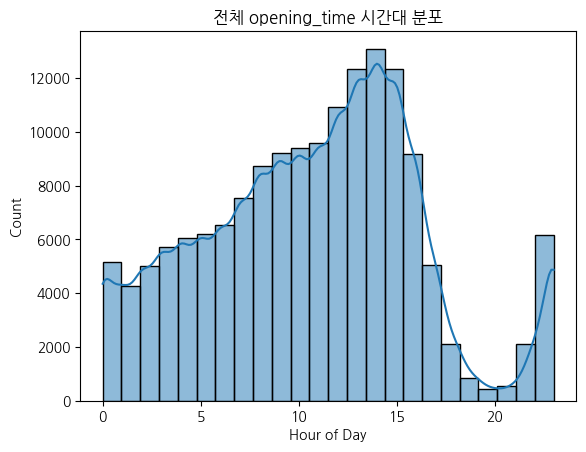

In [30]:
# 시간대 분포 확인 
sns.histplot(polls_questionset_df['opening_hour'], bins=24, kde=True)
plt.title("전체 opening_time 시간대 분포")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()

In [36]:
# 사용자별 평균과 중앙값 비교
user_time_stats = polls_questionset_df.groupby('user_id')['opening_hour'].agg(['mean', 'median', 'std']).reset_index()
user_time_stats.head()

,user_id,mean,median,std
0,838023,9.714286,9.0,4.151879
1,838466,10.454545,11.0,6.139081
2,838642,14.500000,14.5,0.707107
3,839357,11.666667,12.0,6.047703
4,840293,8.450000,8.5,5.276313


In [34]:
# 평균과 중앙값 차이가 큰 사용자들 보기
user_time_stats['diff'] = abs(user_time_stats['mean'] - user_time_stats['median'])
user_time_stats.sort_values('diff', ascending=False).head()

,user_id,mean,median,std,diff
4063,1363799,9.333333,3.0,11.846237,6.333333
1941,983395,16.600000,22.0,9.864076,5.400000
1856,950506,10.714286,16.0,7.653197,5.285714
4645,1460736,16.888889,22.0,8.222598,5.111111
3662,1271255,11.000000,16.0,7.348469,5.000000


- 일부 유저는 극단값 존재하여 평균과 중앙값이 6시간 차이나기도 함!
- 평균보다는 중앙값으로 넣기로 결정!

In [19]:
# 질문오픈시간대 user_id별 중앙값 구하기
opening_hour_df = polls_questionset_df.groupby('user_id')['opening_hour'].median().reset_index()

print(opening_hour_df.shape) # 4972명 유저 
opening_hour_df.describe()

(4972, 2)


,user_id,opening_hour
count,4.972000e+03,4972.000000
mean,1.111701e+06,10.990648
std,2.175287e+05,2.352202
min,8.380230e+05,0.000000
25%,8.852035e+05,10.000000
50%,1.117994e+06,11.000000
75%,1.276630e+06,12.500000
max,1.583358e+06,23.000000


## 회원가입 후 첫 투표까지 소요일
- user_questionrecord 에서 created_at 최솟값과 accounts_user의 created_at의 차이

In [42]:
accounts_userquestionrecord_df['user_id'].nunique()

4849

In [48]:
accounts_user_df['user_id'].nunique()

677082

In [60]:
# userquestionrecord_df의 user_id가 user_df의 user_id에 모두 포함되는지 확인
set(accounts_userquestionrecord_df['user_id']).issubset(set(accounts_user_df['user_id']))


True

In [20]:
# user_questionrecord에서 user_id 별 created_at의 최솟값 구하기
first_question_create_df = accounts_userquestionrecord_df.groupby('user_id')['created_at'].min().reset_index()
first_question_create_df.head()

,user_id,created_at
0,838023,2023-04-29 16:22:56
1,838466,2023-05-02 22:42:05
2,838642,2023-04-28 14:18:07
3,839357,2023-04-29 16:51:01
4,840293,2023-05-03 02:24:05


In [21]:
# 가입일 + 첫 투표일 결합
merged_df = accounts_user_df[['user_id', 'created_at']].merge(
    first_question_create_df,
    on='user_id',
    how='inner'  # 투표한 유저만 대상으로
)

# 컬럼명 변경
merged_df = merged_df.rename(columns = {'created_at_x':'created_at', 'created_at_y':'first_vote_date'})
# 가입 후 첫 투표까지 걸린 일수 계산
merged_df['days_to_first_vote'] = (merged_df['first_vote_date'] - merged_df['created_at']).dt.days


In [22]:
merged_df.shape

(4849, 4)

In [75]:
merged_df.head()

,user_id,created_at,first_vote_date,days_to_first_vote
0,838023,2023-04-19 09:06:00.719792,2023-04-29 16:22:56,10
1,838466,2023-04-19 15:10:56.560337,2023-05-02 22:42:05,13
2,838642,2023-04-20 00:11:00.962160,2023-04-28 14:18:07,8
3,839357,2023-04-20 14:26:20.479856,2023-04-29 16:51:01,9
4,840293,2023-04-21 11:45:56.750174,2023-05-03 02:24:05,11


In [76]:
merged_df['days_to_first_vote'].describe()

count    4849.000000
mean        0.489998
std         2.625315
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        84.000000
Name: days_to_first_vote, dtype: float64

In [23]:
# 데이터 프레임 필요 컬럼만 추출해서 저장
first_vote_days_df = merged_df[['user_id','days_to_first_vote']]

In [24]:
first_vote_days_df['user_id'].nunique()

4849

# 모든 컬럼 병합

accounts_user_df : 677082명          
chosen_cnt_df : 15426명     
choose_cnt_df : 4849명    
send_cnt_df : 649072명    
receive_cnt_df : 660841명    
point_event_cnt_df : 308명    
opening_hour_df : 4972명    
merged_df(첫투표까지 소요일수) : 4849명    

### 승희 작업본 불러오기

In [25]:
# 인증
key_path = "../config/codeit_project_vm_key.json"
credentials = service_account.Credentials.from_service_account_file(key_path)

# GCS 클라이언트 생성
client = storage.Client(credentials=credentials)
bucket = client.bucket("part4_project")

# 'for_machine_learning/' 경로에 있는 .parquet 파일 리스트 가져오기
blobs = bucket.list_blobs(prefix="for_machine_learning/")
machine_file_list = [f"gs://part4_project/{blob.name}" for blob in blobs if blob.name.endswith(".parquet")] 

# 결과 확인
machine_file_list

['gs://part4_project/for_machine_learning/attendance.parquet',
 'gs://part4_project/for_machine_learning/blocked.parquet',
 'gs://part4_project/for_machine_learning/df_y.parquet',
 'gs://part4_project/for_machine_learning/fail.parquet',
 'gs://part4_project/for_machine_learning/payment.parquet',
 'gs://part4_project/for_machine_learning/vote_summary.parquet']

In [26]:
# 파일들을 각각 변수로 불러오기
for title in machine_file_list:
    # GCS 경로에서 파일명 추출
    file_name = title.split('/')[-1].replace('.parquet', '')
    
    # Parquet 파일 읽기
    df = pd.read_parquet(title, storage_options={"token": key_path})
    
    # 각각의 이름_df로 저장 (ex. device_properties_df)
    globals()[f"{file_name}_df"] = df
    
    # 출력 확인 (shape + head)
    print(f"\n {file_name}_df 불러오기 완료")
    print(f"→ shape: {df.shape}")
    print(f"→ 첫 5행:")
    display(df.head())


 attendance_df 불러오기 완료
→ shape: (349637, 2)
→ 첫 5행:


,user_id,attendance_days
0,1446852,13
1,1359398,33
2,1501542,9
3,1507767,30
4,1287453,31



 blocked_df 불러오기 완료
→ shape: (16240, 2)
→ 첫 5행:


,user_id,blocked_cnt
0,832740,1
1,833422,1
2,834486,1
3,835888,1
4,835907,1



 df_y_df 불러오기 완료
→ shape: (677082, 2)
→ 첫 5행:


,user_id,y
0,831962,0
1,832151,0
2,832340,0
3,832520,0
4,832614,0



 fail_df 불러오기 완료
→ shape: (160, 2)
→ 첫 5행:


,user_id,failpayment_cnt
0,834112,1
1,877422,1
2,878664,1
3,892843,1
4,894196,1



 payment_df 불러오기 완료
→ shape: (59192, 2)
→ 첫 5행:


,user_id,payment
0,833041,1
1,834112,1
2,835815,1
3,835839,1
4,835888,1



 vote_summary_df 불러오기 완료
→ shape: (4849, 2)
→ 첫 5행:


,user_id,vote_rate
0,838023,4.400000
1,838466,0.942446
2,838642,10.000000
3,839357,7.851852
4,840293,13.076923


In [29]:
# 병합할 df 리스트
merge_targets = [
    'first_vote_days_df',
    'chosen_cnt_df',
    'choose_cnt_df',
    'send_cnt_df',
    'receive_cnt_df',
    'point_event_cnt_df',
    'opening_hour_df',
    'attendance_df',
    'blocked_df',
    'df_y_df',
    'fail_df',
    'payment_df',
    'vote_summary_df'
]

final_user_merged_df = accounts_user_df.copy()

for df_name in merge_targets:
    temp_df = globals()[df_name]
    temp_df.columns = temp_df.columns.str.strip()  # 공백 제거
    if 'user_id' in temp_df.columns:
        print(f"Merging: {df_name} (shape: {temp_df.shape})")
        final_user_merged_df = final_user_merged_df.merge(temp_df, on='user_id', how='left')
    else:
        print(f"⚠️ Skipped {df_name} — 'user_id' column not found.")

print("✅ 최종 병합 완료:", final_user_merged_df.shape)



Merging: first_vote_days_df (shape: (4849, 2))
Merging: chosen_cnt_df (shape: (15426, 2))
Merging: choose_cnt_df (shape: (4849, 2))
Merging: send_cnt_df (shape: (649072, 2))
Merging: receive_cnt_df (shape: (660841, 2))
Merging: point_event_cnt_df (shape: (308, 2))
Merging: opening_hour_df (shape: (4972, 2))
Merging: attendance_df (shape: (349637, 2))
Merging: blocked_df (shape: (16240, 2))
Merging: df_y_df (shape: (677082, 2))
Merging: fail_df (shape: (160, 2))
Merging: payment_df (shape: (59192, 2))
Merging: vote_summary_df (shape: (4849, 2))
✅ 최종 병합 완료: (677082, 31)


In [30]:
final_user_merged_df.columns

Index(['user_id', 'is_superuser', 'is_staff', 'gender', 'point',
       'friend_id_list', 'is_push_on', 'created_at', 'block_user_id_list',
       'hide_user_id_list', 'ban_status', 'report_count', 'alarm_count',
       'pending_chat', 'pending_votes', 'group_id', 'friend_id_list_transform',
       'friend_cnt', 'days_to_first_vote', 'chosen_cnt', 'choose_cnt',
       'send_cnt', 'receive_cnt', 'point_event_cnt', 'opening_hour',
       'attendance_days', 'blocked_cnt', 'y', 'failpayment_cnt', 'payment',
       'vote_rate'],
      dtype='object')

In [31]:
# parquet으로 내보내기
final_user_merged_df.to_parquet(f"../data/final_user_merged_df.parquet", engine="pyarrow", compression="snappy")

In [33]:
final_user_merged_df.isnull().sum()

user_id                          0
is_superuser                     0
is_staff                         0
gender                           0
point                            0
friend_id_list                   0
is_push_on                       0
created_at                       0
block_user_id_list               0
hide_user_id_list                0
ban_status                       0
report_count                     0
alarm_count                      0
pending_chat                     0
pending_votes                    0
group_id                         0
friend_id_list_transform         0
friend_cnt                       0
days_to_first_vote          672233
chosen_cnt                  661656
choose_cnt                  672233
send_cnt                     28010
receive_cnt                  16241
point_event_cnt             676774
opening_hour                672110
attendance_days             327445
blocked_cnt                 660842
y                                0
failpayment_cnt     